     GIT HUB URL

     'GitHub acc': 'https://github.com/eoinosuilleabhain'

    INTRODUCTION
    For my project assignment I chose the English premier League 2000 to 2018 and player transfers in that period.
    I have a lifelong interest in sport both as a spectator and as participant and I selected the English Premier League    because it is of interest to many people and I thought the results might be interesting to tabulate and visualise. 
    DATASET
    I obtained 2 datasets from Kaggle as follows:
    Final dataset
    Football_transfers_top250-00-19


#####    Implementation process
    In summary:
    I imported and installed relevant programs
    I included 2 dictionaries with information to reference later in project.
    I read the first csv file in (final dataset). I had difficulties with format of date on this file. On speaking to people in the field I now understand this can be a bit of a minefield! I requested some assistance on this point on 12/2/22 but I understand it is probably not cricket in these matters to influence results and so on. When I attempted to merge it with the transfers dataset all the information did not transfer across.
    I subsequently merged my second dataset regarding transfers with one of my dictionaries after creating a dataframe from our dictionary. I plotted this and garnered some interesting results. 
    * I performed rudimentary analysis of files, 
    * created new columns, 
    * attempted to format dates,  
    * used a function to get points result of each game,
    * Reviewed and plotted goals scored at home and away and how that impacted results.
    * Saw was there any correlation between high money transfers and success.
    * Constructed a web scraping program in order to extract data on transfers (is up-to-date). 
    * Observations made at end of report.

    I tried to pick a few areas and tease them out.


In [35]:
! pip install seaborn



In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
UCDproject = {'Author': 'Eoin ó Súilleabháin', 'Email': 'eoinosuilleabhain@hotmail.com', 
              'GitHub acc': 'https://github.com/eoinosuilleabhain', 'Deadline': '17 Feb 2022'}


In [6]:
PLW={'2000_01': 'Man United', '2001_02': 'Arsenal', '2002_03': 'Man United', '2003_04': 'Arsenal', 
                               '2004_05': 'Chelsea', '2005_06': 'Chelsea', '2006_07': 'Man United', '2007_08': 'Man United',
                                '2008_09': 'Man United', '2009_10': 'Chelsea', '2010_11': 'Man United', '2011_12': 'Man City',
                                '2012_13': 'Man United', '2013_14': 'Man City', '2014_15': 'Chelsea', '2015_16': 'Leicester',
                                '2016_17': 'Chelsea', '2017_18': 'Man City'}


    WEB SCRAPING USING PYTHON)
    Here I used Transfermarkt to get the required information about football transfers.
    I created a script to: 
    * get the latest transfer data.
    * obtain information (goals, assists, cards, etc.) about players
    * create a graphic representation through the scraped data
    * scrape the data
    * the information was read from the table, and saved in a csv file using BeautifulSoup, which is a library that pulls data out of HTML and XML files, (in our case HTML). With bs4 it’s possible to transform rows and columns of a table into a Python list of dictionaries.
    To start with relevant libraries were imported.
    Request made to the web address
    Used BeautifulSoup to pull data from HTML
    Csv to put the data in the csv file
    Utlised Re to handle regex
    Then created some functions to help throughout the application. Starting with data_to_csv which receives a list to save a csv output file.
    Also have the format_text function that takes a string and remove some chars like double with spaces or escape sequences.
    Then a function to handle with the currency.
    And finally our function responsible for accessing the pages, transform the HTML in a soup object, look for an element with the responsive-table class, so iterate all the even and odd classes to get the ‘tds’ or cell and then create a dictionary with the information we need, appending the various players to the players_list and finally return on line 46. 
    Then we run the script saying that we want to browse the first 10 pages, remembering that each page displays 25 players, we’ll have 250 players in all. 
    So, we send the dictionary to the function data_to_csv responsible for saving the data in a csv file.
    I have uploaded the jupyter notebook separately to GitHub.


    READ IN CSV FILE

In [7]:
df=pd.read_csv('final_dataset.csv.zip', parse_dates=True)

    Convert dates into correct format (datetime64[ns]):

In [8]:
df['Date']=pd.to_datetime(df.Date)

In [9]:
df['New_Date'] = pd.to_datetime(df.Date, format = '%d/%m/%y', errors = 'coerce')
fil = df.New_Date.isnull()
df.loc[fil, 'New_Date'] = pd.to_datetime(df[fil]['Date'], errors = 'coerce')


     I have done some basic analysis of main dataset:¶

In [10]:
df.dtypes

Unnamed: 0                int64
Date             datetime64[ns]
HomeTeam                 object
AwayTeam                 object
FTHG                      int64
FTAG                      int64
FTR                      object
HTGS                      int64
ATGS                      int64
HTGC                      int64
ATGC                      int64
HTP                     float64
ATP                     float64
HM1                      object
HM2                      object
HM3                      object
HM4                      object
HM5                      object
AM1                      object
AM2                      object
AM3                      object
AM4                      object
AM5                      object
MW                      float64
HTFormPtsStr             object
ATFormPtsStr             object
HTFormPts                 int64
ATFormPts                 int64
HTWinStreak3              int64
HTWinStreak5              int64
HTLossStreak3             int64
HTLossSt

In [37]:
df.shape

(6840, 46)

    So there are 6,840 rows and 40 columns in df
    Let's look at all columns and their data types:


In [40]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       6840 non-null   int64         
 1   Date             6840 non-null   datetime64[ns]
 2   HomeTeam         6840 non-null   object        
 3   AwayTeam         6840 non-null   object        
 4   FTHG             6840 non-null   int64         
 5   FTAG             6840 non-null   int64         
 6   FTR              6840 non-null   object        
 7   HTGS             6840 non-null   int64         
 8   ATGS             6840 non-null   int64         
 9   HTGC             6840 non-null   int64         
 10  ATGC             6840 non-null   int64         
 11  HTP              6840 non-null   float64       
 12  ATP              6840 non-null   float64       
 13  HM1              6840 non-null   object        
 14  HM2              6840 non-null   object 

,Unnamed: 0,FTHG,FTAG,HTGS,ATGS,HTGC,ATGC,HTP,ATP,MW,...,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,score_diff,Points_home,score_diff_away,Points_away,Total Points
count,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,...,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,3419.500000,1.527485,1.130263,24.416667,24.514327,24.497807,24.347515,1.209014,1.226768,19.500000,...,0.010234,-0.009690,0.014539,-0.017755,-0.018086,0.397222,1.648977,-0.397222,1.095029,2.744006
std,1974.682253,1.297913,1.124566,17.178524,17.136894,16.401571,16.341557,0.530186,0.523176,10.966658,...,0.100651,0.693593,0.692937,0.668523,0.408488,1.763704,1.309988,1.763704,1.254687,0.436450
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,-3.000000,-3.333333,-2.363636,-2.250000,-6.000000,0.000000,-8.000000,0.000000,2.000000
25%,1709.750000,1.000000,0.000000,11.000000,11.000000,11.000000,11.000000,0.888889,0.906250,10.000000,...,0.000000,-0.500000,-0.464286,-0.451613,-0.176471,-1.000000,0.000000,-1.000000,0.000000,2.000000
50%,3419.500000,1.000000,1.000000,23.000000,23.000000,23.000000,23.000000,1.172414,1.192308,19.500000,...,0.000000,-0.076923,-0.050000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000
75%,5129.250000,2.000000,2.000000,35.000000,35.000000,36.000000,36.000000,1.555556,1.562500,29.000000,...,0.000000,0.400000,0.421053,0.428571,0.153846,1.000000,3.000000,1.000000,3.000000,3.000000
max,6839.000000,9.000000,7.000000,102.000000,105.000000,85.000000,82.000000,2.736842,2.761905,38.000000,...,1.000000,4.000000,3.500000,2.285714,2.250000,8.000000,3.000000,6.000000,3.000000,3.000000


    Above we have various stats, mean, standard deviation etc for all columns.
     Later, I will concentrate on columns relating to matches won/lost and goals scored.


    df.head() and df.tail() give a handy synopsis of dataset, column and top 5 and bottom 5 rows respectively.

    Create a new column 'Points_home' to show 3 points for a win, 1 for a draw and 0 for a loss.

In [38]:
df['score_diff']=df['FTHG']-df['FTAG']
def foo(row):
    if row.score_diff>=1:
        return 3
    elif row.score_diff<0:
        return 0
    else:
        return 1
df['Points_home'] = df.apply(foo, axis=1)


    Create a new column 'Points_away' to show 3 points for an away win, draw is covered in above.

In [39]:
df['score_diff_away']=df['FTAG']-df['FTHG']
def foo(row):
    if row.score_diff_away>=1:
        return 3
    elif row.score_diff_away<0:
        return 0
    else:
        return 1
df['Points_away'] = df.apply(foo, axis=1)


    Add both columns to give total points taking where a club is home or away:

In [13]:
df['Total Points']=df['Points_home']+df['Points_away']

In [14]:
df_new = df.groupby('HomeTeam')['Points_home'].sum() + df.groupby('AwayTeam')['Points_away'].sum()
df_new.sort_values()


HomeTeam
Bradford              26
Cardiff               30
Coventry              34
Huddersfield          37
Sheffield United      38
Blackpool             39
Brighton              40
Middlesboro           49
Derby                 83
QPR                   92
Ipswich              102
Reading              119
Bournemouth          132
Wolves               136
Watford              154
Burnley              157
Hull                 171
Norwich              191
Leeds                214
Crystal Palace       253
Birmingham           301
Portsmouth           302
Swansea              312
Leicester            322
Charlton             325
Wigan                331
Middlesbrough        383
Stoke                457
West Brom            464
Bolton               506
Sunderland           520
Blackburn            530
Southampton          530
Fulham               586
West Ham             683
Aston Villa          750
Newcastle            790
Everton              990
Man City            1082
Tottenham       

    REVIEW OF GOALS AND WINS. Below score check agrees with dataset and I have spot checked some values. Interestingly there are more away wins (NH) than at home (H).

In [41]:
df['FTHG'].value_counts(ascending=False)

1    2185
2    1698
0    1596
3     839
4     347
5     114
6      42
7      13
8       5
9       1
Name: FTHG, dtype: int64

In [42]:
df['FTAG'].value_counts(ascending=False)

1    2366
0    2364
2    1294
3     566
4     190
5      42
6      17
7       1
Name: FTAG, dtype: int64

In [43]:
df['FTR'].value_counts(ascending=False)

NH    3664
H     3176
Name: FTR, dtype: int64

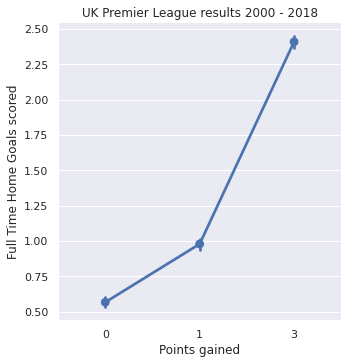

In [44]:
sns.catplot(x="Points_home", y="FTHG", kind="point", data=df)
plt.title('UK Premier League results 2000 - 2018')
plt.xlabel('Points gained')
plt.ylabel('Full Time Home Goals scored')
sns.set_style('darkgrid')
plt.show()


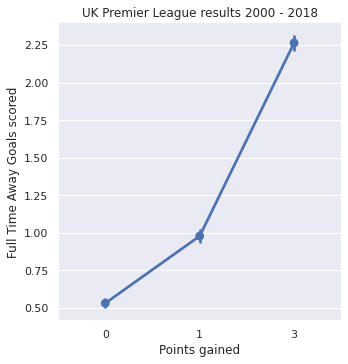

In [45]:
sns.catplot(x="Points_away", y="FTAG", kind="point", data=df)
plt.title('UK Premier League results 2000 - 2018')
plt.xlabel('Points gained')
plt.ylabel('Full Time Away Goals scored')
plt.show()


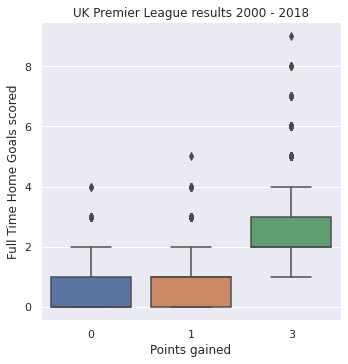

In [46]:
sns.catplot(x="Points_home", y="FTHG", kind="box", data=df)
plt.title('UK Premier League results 2000 - 2018')
plt.xlabel('Points gained')
plt.ylabel('Full Time Home Goals scored')
plt.show()


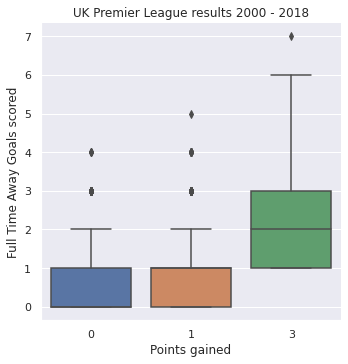

In [47]:
sns.catplot(x="Points_away", y="FTAG", kind="box", data=df)
plt.title('UK Premier League results 2000 - 2018')
plt.xlabel('Points gained')
plt.ylabel('Full Time Away Goals scored')
plt.show()


    Create dataframe from our dictionary

In [16]:
data_items = PLW.items()
data_list = list(data_items)
df1 = pd. DataFrame(data_list) 
df1.columns =['Season', 'Club']
print(df1)


     Season        Club
0   2000_01  Man United
1   2001_02     Arsenal
2   2002_03  Man United
3   2003_04     Arsenal
4   2004_05     Chelsea
5   2005_06     Chelsea
6   2006_07  Man United
7   2007_08  Man United
8   2008_09  Man United
9   2009_10     Chelsea
10  2010_11  Man United
11  2011_12    Man City
12  2012_13  Man United
13  2013_14    Man City
14  2014_15     Chelsea
15  2015_16   Leicester
16  2016_17     Chelsea
17  2017_18    Man City


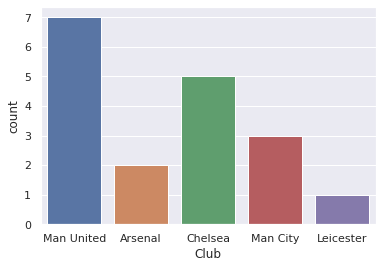

In [18]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Club", data=df1)


    During this period the winners were :
    Man United 7
    Chelsea 5
    Man City 3
    Arsenal	2
    Leicester 1

    Arsenal have been consistent in scoring points but have only won twice in this period. Chelsea who are only 39 points ahead have 3 more titles.


    MERGE WITH Transfer data

In [19]:
df2=pd.read_csv('Football_transfers_top250-00-19.csv')

In [21]:
df2[['Name', 'Position', 'League_to', 'Team_to', 'Season', 'Transfer_fee']]
df3=df2[df2['League_to']=='Premier League']
df3.sort_values(['Transfer_fee', 'Team_to' ] , ascending=[False, False])
top20=df3.nlargest(20, 'Transfer_fee')


In [22]:
table = pd.pivot_table(top20,index=['Team_to'],values=['Transfer_fee'], aggfunc=np.sum)
table


,Transfer_fee
Team_to,
Arsenal,116750000
Chelsea,181500000
Liverpool,201300000
Man City,438300000
Man Utd,383700000


In [23]:
result = pd.concat([top20, table], axis=1)

In [27]:
result1=result.iloc[:, 0:10]
result1.dropna()


,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
2475,Fernando Torres,Centre-Forward,26.0,Liverpool,Premier League,Chelsea,Premier League,2010-2011,50000000.0,58500000.0
3469,Ãngel Di MarÃ­a,Right Winger,26.0,Real Madrid,LaLiga,Man Utd,Premier League,2014-2015,50000000.0,75000000.0
3713,Kevin De Bruyne,Attacking Midfield,24.0,VfL Wolfsburg,1.Bundesliga,Man City,Premier League,2015-2016,45000000.0,76000000.0
3714,Raheem Sterling,Right Winger,20.0,Liverpool,Premier League,Man City,Premier League,2015-2016,40000000.0,63700000.0
3716,Anthony Martial,Left Winger,19.0,Monaco,Ligue 1,Man Utd,Premier League,2015-2016,8000000.0,60000000.0
3961,Paul Pogba,Central Midfield,23.0,Juventus,Serie A,Man Utd,Premier League,2016-2017,70000000.0,105000000.0
3965,John Stones,Centre-Back,22.0,Everton,Premier League,Man City,Premier League,2016-2017,28000000.0,55600000.0
4214,Romelu Lukaku,Centre-Forward,24.0,Everton,Premier League,Man Utd,Premier League,2017-2018,50000000.0,84700000.0
4215,Virgil van Dijk,Centre-Back,26.0,Southampton,Premier League,Liverpool,Premier League,2017-2018,30000000.0,78800000.0
4217,Ãlvaro Morata,Centre-Forward,24.0,Real Madrid,LaLiga,Chelsea,Premier League,2017-2018,40000000.0,66000000.0


    Above are top 20 transfers by club in the period under review.

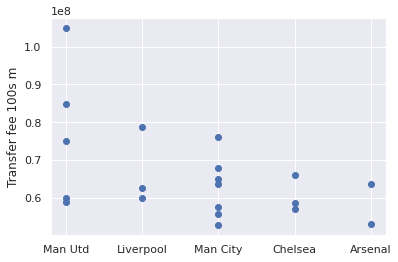

In [29]:
fig, ax=plt.subplots()
ax.scatter(top20['Team_to'], top20['Transfer_fee'])
ax.set_ylabel('Transfer fee 100s m')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

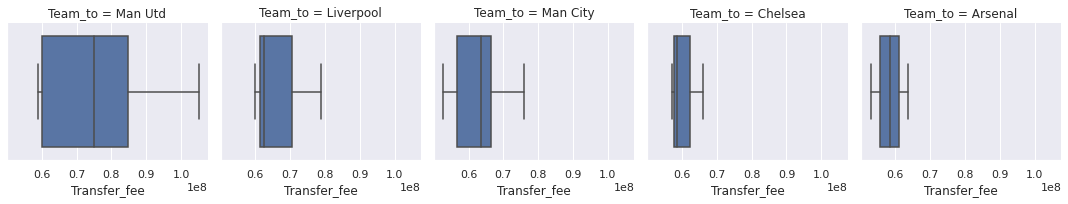

In [30]:
g=sns.FacetGrid(top20, col='Team_to')
g.map(sns.boxplot, 'Transfer_fee', order=[1,2,3,4])
plt.show


In [31]:
pd.crosstab(top20['Team_to'], top20['Season'], 
            values=top20['Transfer_fee'],aggfunc='mean').round(0)


Season,2010-2011,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019
Team_to,,,,,,
Arsenal,NaN,NaN,NaN,NaN,58375000.0,NaN
Chelsea,58500000.0,NaN,NaN,NaN,66000000.0,57000000.0
Liverpool,NaN,NaN,NaN,NaN,78800000.0,61250000.0
Man City,NaN,NaN,69850000.0,55600000.0,58400000.0,67800000.0
Man Utd,NaN,75000000.0,60000000.0,105000000.0,84700000.0,59000000.0


<AxesSubplot:xlabel='Season', ylabel='Position'>

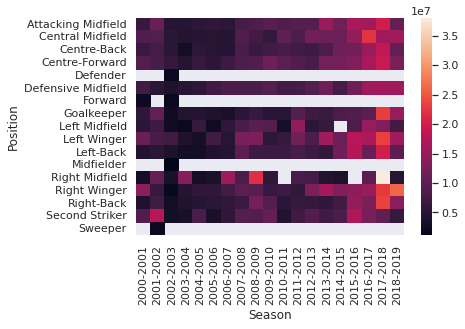

In [32]:
sns.heatmap(pd.crosstab(df2['Position'], df2['Season'], 
            values=df2['Transfer_fee'], aggfunc='mean'))


    Here we see a simple scatter plot of what teams succeeded in each season

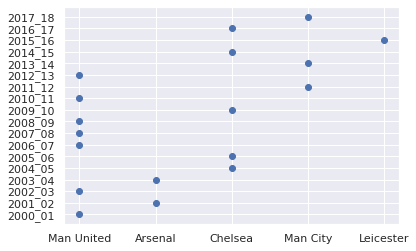

In [33]:
keys=PLW.keys()
values=PLW.values()
plt.scatter(values, keys)


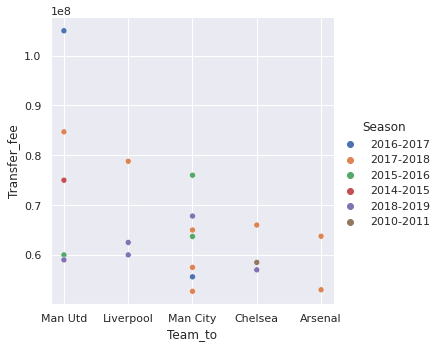

In [34]:
sns.relplot(data=top20, y="Transfer_fee", x="Team_to", hue="Season")

As we can see the consistently successful teams have spent most. 

INSIGHTS:
More away wins than at home is very interesting.
1. It shows for the away team to win (3 points) they mostly achieved this by scoring just the one goal. So there is truth to the adage "keep it tight away from home and try and nick a goal" Conversely, although Home team sides win scoring more as we saw earlier, overall teams are winning less at home than they are away from home.
2. Perhaps coming away from figures for a moment, the home team buoyed by their supporters play with more abandon but also with less care. Players away from home are able to concentrate better on just the match. They have no ties to staff, supporters at the match location and so on. They have less emotional pressure on them to win.
3. When a team wins away from home they are mainly doing so by scoring few goals. However, the home team tends to score a lot more goals. 
These big wins cloud many peoples jugdement because the consensus is teams should win away from home. 
However, the figures suggest otherwise!
4. The advice to football management would be that a rebalancing is required for more or continued success. Teams at home should be attack minded and confident but must ensure they don't commit too many men forward. It must be impressed on the back four and midfielders that they must provide defensive cover. The ball can travel faster than any player so if too many players are out of position an astute long ball can put the offence in on goal. 
Out of position players are powerless to do anything.

“It was Paisley’s judgement that Hansen was good enough and intelligent enough for the side and that a quiet word would suffice…… he pulled Hansen aside and put an arm on his shoulder. ‘Look lad, I know I’m getting on a bit but I’m still too young to have a heart attack. Just watch it will you?’
The boot room also decided that Hansen wasn’t strong enough. They saw to it that Hansen put on two stones of weight under what they called the ‘Anfield diet’.”
P. 167. Quiet Genius, Bob Paisley, British Football’s Greatest Manager.

5. Activity on the transfer market is not surprising. The successful teams draw support and revenue which gives them the opportunity of investing in their team. In modern football we see more injection of revenue from avenues other than traditional gate receipts. Some clubs also are willing to run large deficits to bolster their chances.
More analysis is required because we are looking at global figures. There is a different story for each club. 
Analysis can certainly point out flaws and oportunities for improvement, but after that football leans more towards art than science.


Q7. 
PREDICTING FOOTBALL RESULTS 

In order to try and predict football results I would consider using logistic regression which is a statistical model used for classification. Classification means dealing with categorical variables to predict. In the case of predicting who will win a match, in the case of football, you will have three classes: the home team wins, the away team wins or it is a draw.

Logistic regression being a model for two classes (0 when the event has not realized and 1 the event realized). To predict the winner of the football match, we will need three models, each of them will predict a different event. One for the home team to win, one for the way team to win, and one for the draw.
The logistic regression model can be explained using probabilities but you can also see it as a model to predict 0 and 1. In fact, the prediction is not perfect and falls into the range {0,1} in such a way that they can be interpreted as the probability that the event realizes (prediction close to 1) or the event does not realize (prediction close to 0). 

We already know we need to train three logistic models with a binary target y that represents the match results. For instance, for the “draw model”, the target is 1 if the match result is a draw else it is 0. 

We do not need to explicitly set three models as scikit-learn LogisticRegression will do it for us by specifying the right options. 

So y will be represented in three classes depending on the outcomes. To represent the teams, we will use a one-hot encoder.

Assume we have a league with 20 teams playing home and away. Each team is encoded in a vector of length 40 where each entry can take a value of 1 or 0. The 20 first entries represent the home teams and the 20 left the away teams. Then to encode a match between two teams we just have to put the 1s at the right place. Using scikit-learn that step can be done easily.

We need to factor in regularization to help to reduce the strength and the weakness of strong and weak teams. For instance, if a team always wins the model will be tempted to associate a very large coefficient to that team and lead to over-optimistic prediction.

Testing the model over time and for different leagues/sports one would hope to improve accuracy.

